<a href="https://colab.research.google.com/github/abhinavsingh-github/airbnb-booking-analysis/blob/main/Abhinav_Singh_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

***Airbnb is an online space where person rent their unused rooms or entire house. Irrespective owning any of the property, Airbnb acts as a broker, receiving margin from each booking. Since 2008 Airbnb is growing at fast paced, and now it has over 7 million accommodations in more than 191 countries and regions globally.***

***Now we are going to experiment and understand relationship between different factors in New York City.***




In [1]:
# Importing useful libraries in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive below
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Airbnb NYC dataset
file_path = '/content/drive/MyDrive/Data Science/Capstone Project 1/Airbnb_NYC_2019.csv'
dataset = pd.read_csv(file_path)

In [4]:
# Checking basic info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Viewing head of the dataset
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# Lets create copy of current dataset and now we will work on copied data
airbnb = dataset.copy()

In [7]:
# Finding null values in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**By Checking above, got to know that we have max no. of nulls in last_review and reviews_per_month.**

**After seeing initial data, last_review column is something related to datetype and have more nulls , so I think we can drop this column for further analysis.**

In [8]:
# Dropped last_review column
airbnb.drop('last_review', axis=1, inplace=True)

For rest null values in dataset, we are replacing it by 0 for now.

In [9]:
# Replacing null values by 0 in name, host_name, reviews_per_month
airbnb['name'].fillna(value=0, inplace=True)
airbnb['host_name'].fillna(value=0, inplace=True)
airbnb['reviews_per_month'].fillna(value=0, inplace=True)

In [10]:
# Checking if still any value present in dataset
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Now, we can clearly that there is no null values in dataset now. Now, we can proceed with experiments.**

In [11]:
# Checking unique values over each columns
airbnb.nunique()

id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**Finding Top 10 hosts those are holding largest quantity of listings.**

In [12]:
# Finding top 10 host_id with most quantity of listings
top10_hosts = pd.DataFrame(airbnb.host_id.value_counts()).iloc[:10]
top10_hosts.columns=['count']
top10_hosts['host_id'] = top10_hosts.index
top10_hosts.reset_index(drop=True, inplace=True)
print(top10_hosts)

   count    host_id
0    327  219517861
1    232  107434423
2    121   30283594
3    103  137358866
4     96   12243051
5     96   16098958
6     91   61391963
7     87   22541573
8     65  200380610
9     52    7503643


Text(0.5, 0, 'Host Id')

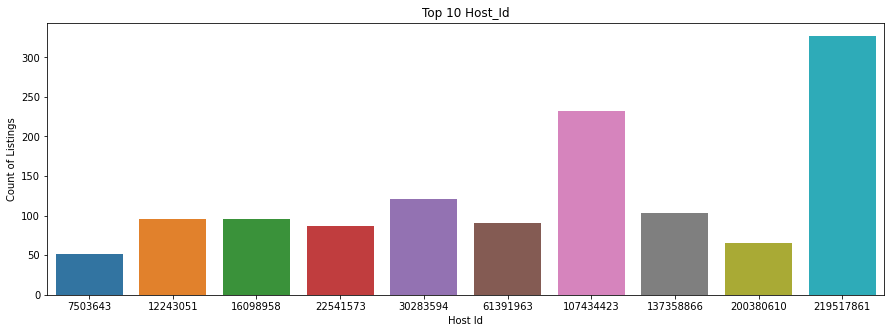

In [13]:
# Plotting graph
plt.figure(figsize=(15,5))
sns.barplot(x="host_id", y="count", data=top10_hosts)

plt.title('Top 10 Host_Id')
plt.ylabel('Count of Listings')
plt.xlabel('Host Id')

From above graph, we can clearly see host_id **219517861** have maximum no. of listings **327**.

**Room Type Analysis: As per unique values, we know that we have 3 three types of room type in dataset.**

In [14]:
# Lets find frequency count of each room_type
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

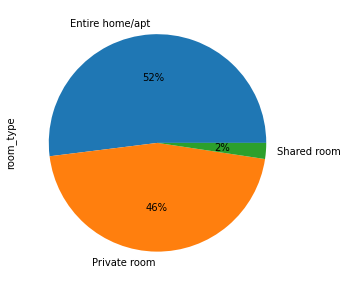

In [15]:
# Plotting pie chart
roomtypefre = airbnb['room_type'].value_counts()
roomtypefre.plot(kind="pie", figsize=(5, 5) , autopct='%1.0f%%')

By above, in our dataset approx **25k customer(52%) choose to use a entire home/apt** whereas **22k customer(46%) choose a private room**, only **1k customer(2%) customer choose a shared room**. By this, we can conclude that mostly customer using airbnb used with family.

**Neighbourhood Group Analysis: As per unique values, we know that we have 5 groups in dataset.**

In [16]:
# Lets find frequency count of each neighbourhood_group
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

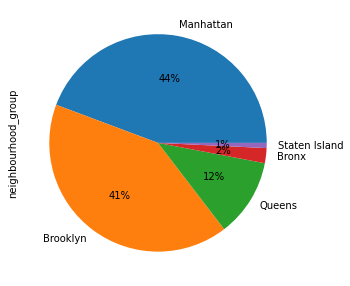

In [17]:
# Plotting pie chart
neigroupfre = airbnb['neighbourhood_group'].value_counts()
neigroupfre.plot(kind="pie", figsize=(5, 5) , autopct='%1.0f%%')

By seeing above chart, **Mahattan(44%)** is place where ***most*** of airbnb transcations happenend, whereas **Staten Island(1%)** is place where ***least*** airbnb transcations happenend. This conclude that customer are most likely to live in Mahattan.

**Analysis of room type in different neighbourhood groups.**

In [18]:
# Finding room_type counts per neighbourhood_group
room_neigh_freq = airbnb.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
print(room_neigh_freq)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


Text(0.5, 0, 'Neighbourhood Groups')

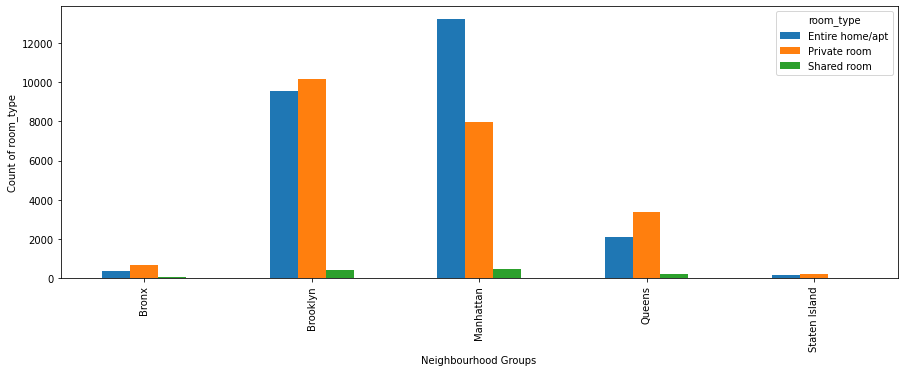

In [19]:
# Plotting graph
room_neigh_freq.plot(kind="bar", figsize=(15,5))

plt.ylabel('Count of room_type')
plt.xlabel('Neighbourhood Groups')

From above graph, we clearly see that **Manhattan** is neighbourhood_group which have ***most 13k+ entire home/apt*** airbnb bookings. **Brooklyn** is neighbourhood_group which have ***most 10k+ private rooms*** airbnb bookings. And in ***shared rooms***, most bookings are from **Manhattan** with **lit less approx 500**.

**Analysis of aggregate price of different room type in each neighbourhood groups.**

In [20]:
# Aggregate price of room_type over each neighbourhood_group
aggprice = airbnb.groupby(['neighbourhood_group','room_type'])['price'].agg(np.mean).unstack()
print(aggprice)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.506596     66.788344    59.800000
Brooklyn                  178.327545     76.500099    50.527845
Manhattan                 249.239109    116.776622    88.977083
Queens                    147.050573     71.762456    69.020202
Staten Island             173.846591     62.292553    57.444444


Text(0.5, 0, 'Neighbourhood Groups')

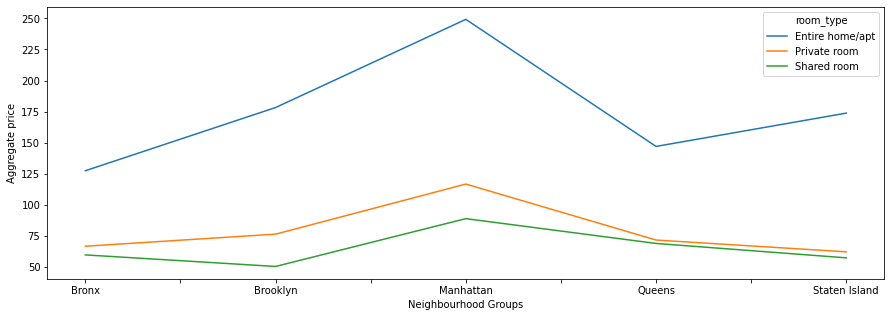

In [21]:
# Plotting line graph
aggprice.plot(kind="line", figsize=(15,5))

plt.ylabel('Aggregate price')
plt.xlabel('Neighbourhood Groups')

By seeing above, it clearly visible that **Manahttan** is neighbourhood group which have ***highest* aggregate price** in all room types(**entire home/private room/shared room**).

But if we talk about lowest aggregate price over different room types, then we notice in case of **Entire room/apt *lowest* aggregate price** is in **Bronx**, in case of **private room Staten Island** and in case of **shared room Brookyln** is having ***lowest* aggregate price**.

**Price Analysis**

In [22]:
# Checking basic description about price column
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

From above, we can see **max price** of any airbnb in our dataset is **10k** and **min price** of any airbnb in our dataset is **0**, which seems like either it's wrong information or might be customer having any coupon through which they haven't paid any single penny for airbnb booking.

In [23]:
# Finding airbnb with max price 10k
airbnb[airbnb['price'] == 10000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


We can see that there are **3** airbnb bookings **one** each from **Queens/Brookyln/Manhattan** having price as 10k.

In [24]:
# Finding airbnb with min price 0
airbnb[airbnb['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


We can see that there are **11** airbnb bookings having price as **0**.

In [25]:
# Lets start analysis on top 10 no. of bookings price
# Print price with top 10 max frequency of bookings and storing in a list
print(airbnb['price'].value_counts().head(10))
list10_prices = airbnb['price'].value_counts().head(10).index.tolist()
print(list10_prices)

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64
[100, 150, 50, 60, 200, 75, 80, 65, 70, 120]


So, we can see that in our dataset **2051** airbnb are booked with price **100 dollars** followed by **2047** booked with price **150 dollars**.

In [26]:
# Finding room type counts for above top 10 price frequency bookings
df1 = airbnb[airbnb['price'].isin(list10_prices)]
df2 = df1[['room_type','price']]
price_roomtype = df2.groupby('price')['room_type'].value_counts().unstack()
print(price_roomtype)

room_type  Entire home/apt  Private room  Shared room
price                                                
50                      73          1417           44
60                     112          1304           42
65                     100          1045           45
70                     178           970           22
75                     274          1040           56
80                     312           939           21
100                    961          1064           26
120                    763           361            6
150                   1620           416           11
200                   1215           176           10


Text(0.5, 0, 'Number of bookings')

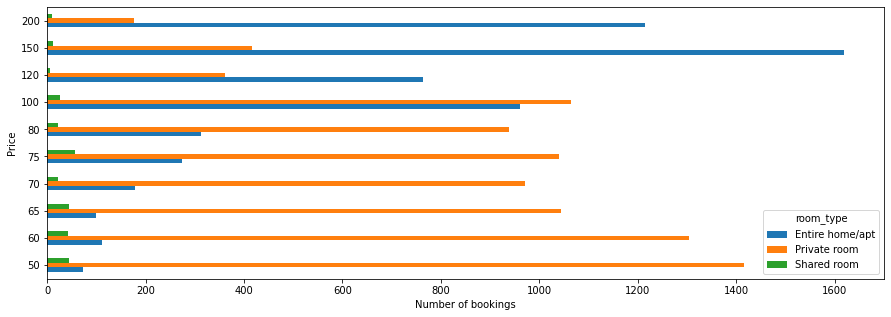

In [27]:
# Plotting graph
price_roomtype.plot(kind="barh", figsize=(15,5))

plt.ylabel('Price')
plt.xlabel('Number of bookings')

We can notice that in our dataset for **entire home/apt** maximum number of bookings are at price ***150 dollars***, whereas in **private room** maximum number of bookings are at price ***50 dollars*** and in **shared room** maximum number of bookings are at price ***75 dollars***.

**Neighbourhood Analysis**

In [32]:
# Lets explore top 10 neighbourhood by counts in dataset
# Store neighbourhood into list
top10_neighbourhood = airbnb['neighbourhood'].value_counts().head(10)
print(top10_neighbourhood)
list10_neighbourhood = airbnb['neighbourhood'].value_counts().head(10).index.tolist()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


Text(0.5, 0, 'Neighbourhood')

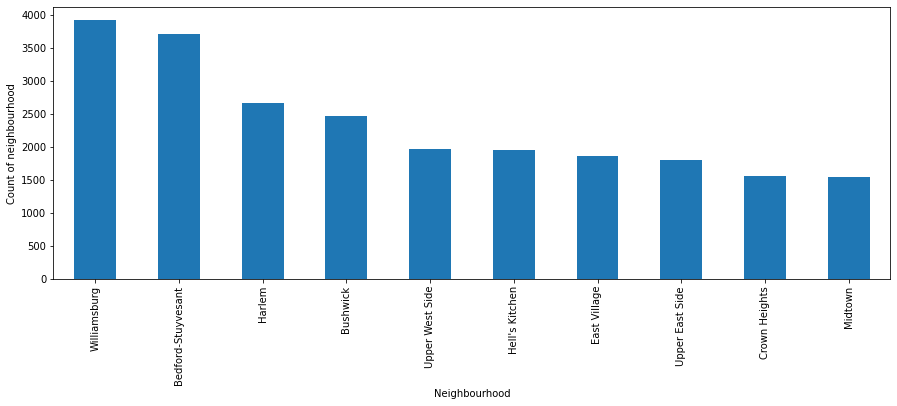

In [34]:
top10_neighbourhood.plot(kind="bar", figsize=(15,5))

plt.ylabel('Count of neighbourhood')
plt.xlabel('Neighbourhood')

Looking to above graph, we can clearly say that **Williamsburg** is ***most popular*** neighbourhood for overall airbnb booking in our dataset and also **Bedford-Stuyvesant** is having very ***less slightly difference*** in overall booking compare to **Williamsburg**. 

In [35]:
# Finding room type counts for above top 10 neighbourhood frequency bookings
dfneigh1 = airbnb[airbnb['neighbourhood'].isin(list10_neighbourhood)]
dfneigh2 = dfneigh1[['room_type','neighbourhood']]
neigh_room_type_freq = dfneigh2.groupby('neighbourhood')['room_type'].value_counts().unstack()
print(neigh_room_type_freq)

room_type           Entire home/apt  Private room  Shared room
neighbourhood                                                 
Bedford-Stuyvesant             1591          2038           85
Bushwick                        678          1719           68
Crown Heights                   759           780           25
East Village                   1170           660           23
Harlem                         1036          1573           49
Hell's Kitchen                 1187           672           99
Midtown                        1100           422           23
Upper East Side                1310           441           47
Upper West Side                1256           675           40
Williamsburg                   1891          1997           32


Text(0.5, 0, 'Neighbourhood')

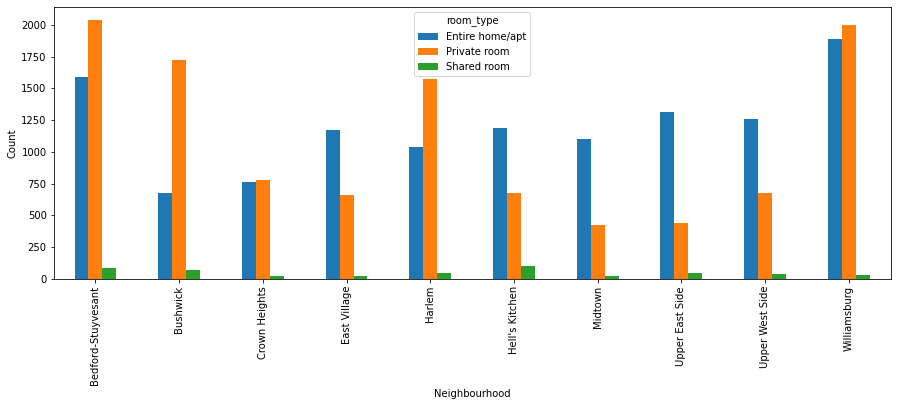

In [36]:
# Plotting graph
neigh_room_type_freq.plot(kind="bar", figsize=(15,5))

plt.ylabel('Count')
plt.xlabel('Neighbourhood')

Now we can see that if we talk about particular room_type then **maximum** no. of **Entire home/apt boookings** are from **Bedford-Stuyvesant**, whereas **maximum** no. of **Private room bookings** are from **Williamsburg**, and **maximum** no. of **Shared room bookings** are from **Hell's Kitchen**.

**Minimum Night Analysis**

In [38]:
# Frequency counts of top 5 minimum nights bookings
min_night = airbnb['minimum_nights'].value_counts().head(5)
print(min_night)

1     12720
2     11696
3      7999
30     3760
4      3303
Name: minimum_nights, dtype: int64


Text(0.5, 0, 'Minimum Nights')

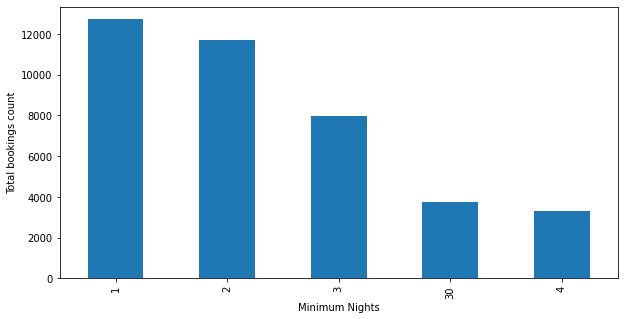

In [40]:
min_night.plot(kind="bar", figsize=(10,5))

plt.ylabel('Total bookings count')
plt.xlabel('Minimum Nights')

In our dataset, we can clearly see that **most of bookings** are done for ***minimum*** **1 night(12.5k+**) and **2 nights(11.5k+)**.

**Number of reviews Analysis**

In [41]:
# Finding frequency counts for number of reviews
airbnb['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

In above, we noticed that we have **1 airbnb booking** those ***number of reviews*** are **very high 607**. Let's find that airbnb.

In [42]:
# Finding airbnb with maximum number of reviews
airbnb[airbnb['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293


**Great Bedroom in Manhattan** Airbnb is having ***most*** number of reviews **607**, we can say that it's a nice place to stay at reasonable price of **49 dollars for private room**.

In [45]:
# Let's explore top 500 number of reviews data
airbnbrev = airbnb.sort_values(by=['number_of_reviews'], ascending=False).head(500)
review = airbnbrev['neighbourhood_group'].value_counts()
print(review)

Brooklyn         210
Manhattan        190
Queens            87
Bronx             10
Staten Island      3
Name: neighbourhood_group, dtype: int64


Text(0.5, 0, 'Neighbourhood Groups')

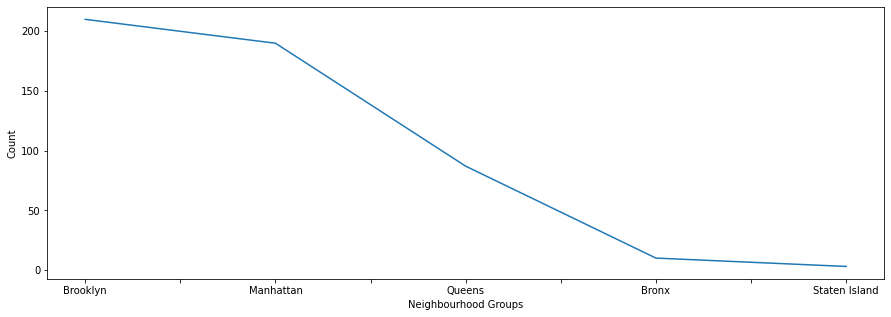

In [46]:
# Plotting line graph
review.plot(kind="line", figsize=(15,5))

plt.ylabel('Count')
plt.xlabel('Neighbourhood Groups')

If we talk about ***top 500 number_of_reviews dataset***, we can see that **most 210** belong to **Brooklyn** and **least 3** belong to **Staten Island**.

**Review per month Analysis**

In [53]:
# Finding airbnb bookings count those reviews_per_month greater than 2
airbnb[airbnb['reviews_per_month'] > 2].reviews_per_month.value_counts().sum()

9765

Surprisingly, out of **49k+** dataset, there are only **9.8k airbnb** records those **reviews per month greater than 2**.

In [54]:
# Finding maximum number of reviews per month
airbnb['reviews_per_month'].max()

58.5

In [56]:
# Finding airbnb with max number of reviews per month
airbnb[airbnb['reviews_per_month'] == 58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.5,9,299


Airbnb '**Enjoy great views of the City in our Deluxe Room!**' in Manhattan is having **max number_of_reviews** per month. ***Name*** of particular airbnb suggest why they are having high number_of_reviews per month.